Handwritten digit recognition

Data collection

Importing the required packages

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the MNIST dataset

In [5]:
 from keras.datasets.mnist import load_data

Using TensorFlow backend.


In [6]:
## load_data -- return value is two tuples train,test
(train_digits,train_labels),(test_digits,test_labels) = load_data()
print(train_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)


In [7]:
print(test_digits.shape)

(10000, 28, 28)


There are 10 classes. from class 0 to class 9

In [8]:
print(train_labels.shape)

(60000,)


Class wise images count

In [9]:
type(train_labels)

numpy.ndarray

In [10]:
import pandas as pd
pd.Series(train_labels).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [11]:
pd.Series(test_labels).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

### EDA
Display a few images with labels.


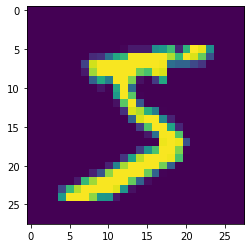

In [12]:
plt.imshow(train_digits[0])

Text(0.5, 1.0, 'Digit 5')

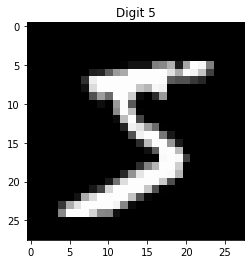

In [13]:
plt.imshow(train_digits[0],cmap='gray')
plt.title("Digit "+ str(train_labels[0]))

In [14]:
train_digits[0][5:10,22:25]

array([[247, 127,   0],
       [195,  64,   0],
       [ 39,   0,   0],
       [  0,   0,   0],
       [  0,   0,   0]], dtype=uint8)

In [15]:
28*28

784

(array([[28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [28.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [26.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [26.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [26.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.],
        [24.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.],
        [21.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.],
        [20.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  4.],
        [20.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,  4.],
        [18.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  6.],
        [15.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  7.],
        [15.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,  1.,  7.],
        [16.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  5.],
        [18.,  0.,  0.,  0.,  0.,  1.,  1.,  3.,  0.,  5.],
        [15.,  1.,  0.,  2.,  2.,  0.,  

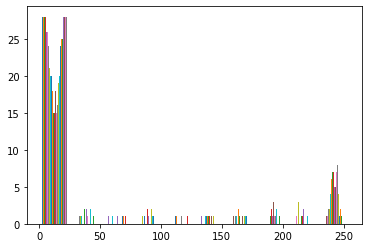

In [16]:
plt.hist(train_digits[0])

(array([639.,  11.,   6.,  11.,   6.,   9.,  11.,  12.,  11.,  68.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

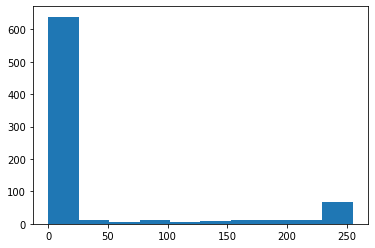

In [17]:
plt.hist(train_digits[0].flat)

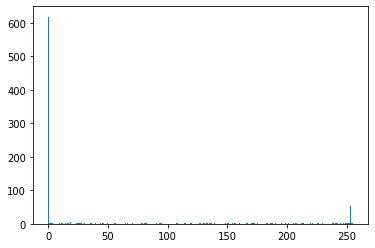

In [18]:
plt.hist(train_digits[0].flat,bins=255)
plt.show()

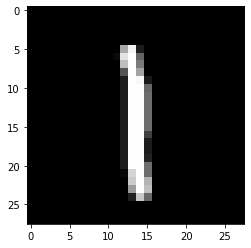

In [19]:
plt.imshow(train_digits[14],cmap='gray')

(array([713.,  17.,   1.,   2.,  10.,   0.,   4.,   4.,   2.,  31.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

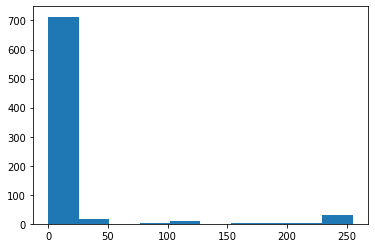

In [20]:
## Pixel distribution for digit 1
plt.hist(train_digits[14].flat)

In [21]:
train_labels[10:20]

array([3, 5, 3, 6, 1, 7, 2, 8, 6, 9], dtype=uint8)

In [23]:
samples = np.random.randint(train_digits.shape[0],size=16)
samples


array([38058,   956,  1431, 25728,  1274,  8595, 48270, 46665, 40331,
       41081, 36755, 49531, 25099, 42387, 42420, 29382])

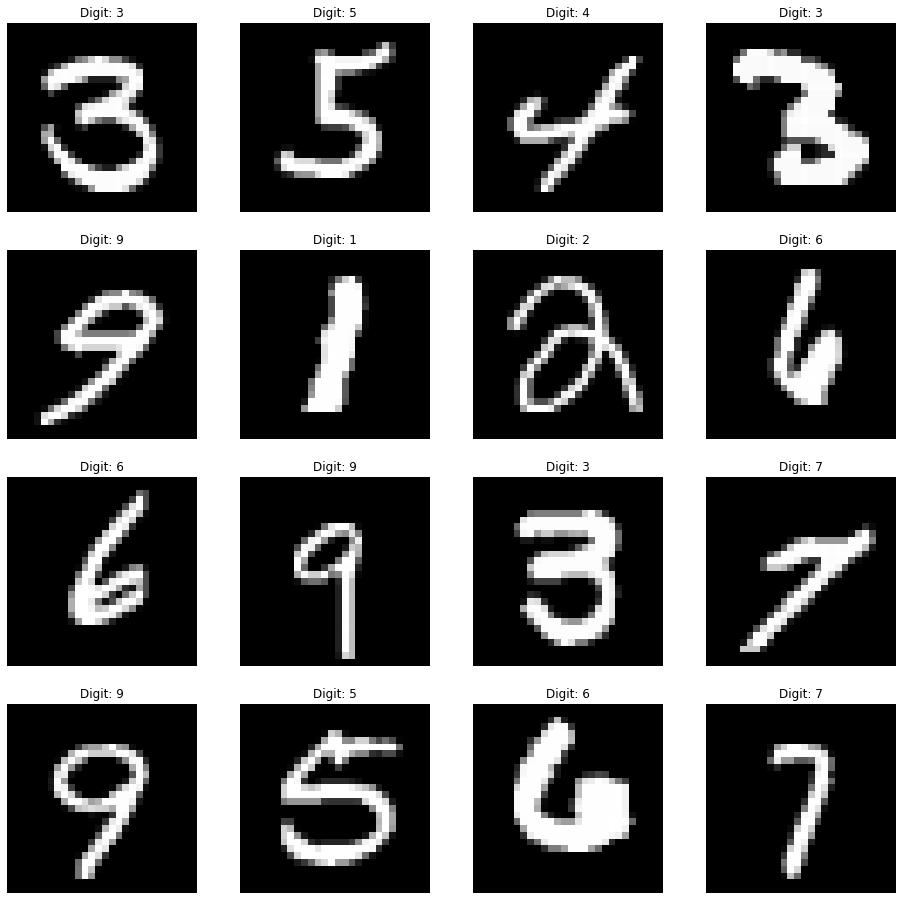

In [24]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i],cmap='gray')
  plt.title("Digit: "+str(train_labels[i]))
  plt.axis('off')
  j += 1

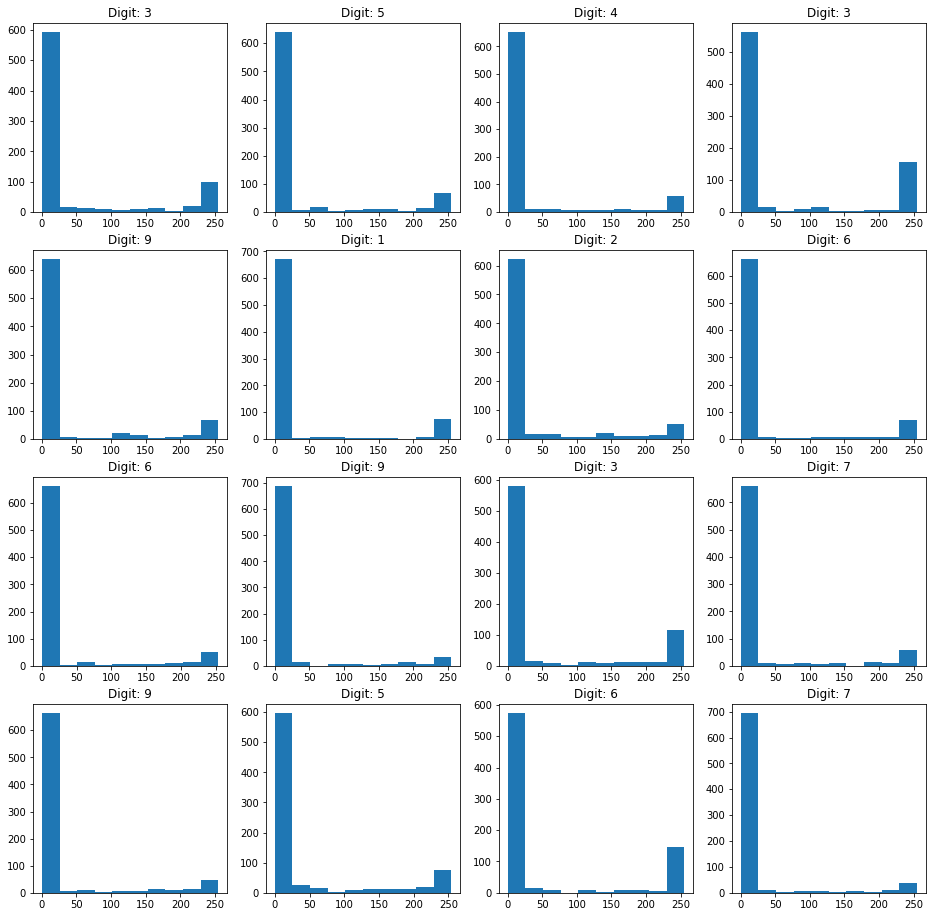

In [25]:
plt.figure(figsize=(16,16))
j = 1
for i in samples:
  plt.subplot(4,4,j)
  plt.hist(train_digits[i].flat)
  plt.title("Digit: "+str(train_labels[i]))
  #plt.axis('off')
  j += 1

### Preprocessing
Scaling

In [26]:
## pixel values are from 0 to 255
train_digits_sc =  train_digits/255.0
test_digits_sc = test_digits/255.0

Convert labels into categorical values

In [28]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [29]:
from keras.utils import to_categorical
train_labels_cat = to_categorical(train_labels)
train_labels_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [30]:
test_labels_cat = to_categorical(test_labels)
test_labels_cat[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Split the train data to train and validation

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)


### Build and Train the model
Build the model

We need to take 1d array as input for Dense layer.

How many Hidden layers you want to add here?

How many neurons in each hidden layer?

What is activation function for the hidden layers?

How many neurons we should take in the ouput layer?

What is the activation function for the output layer?

In [32]:
## import the methods required
from keras.models import Sequential
from keras.layers import Dense,Flatten

In [33]:
784*128+ 128

100480

In [34]:
## We are creating the base model
model = Sequential()
# first layer we need to mention the input shape
model.add(Flatten(input_shape=(28,28))) 
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu')) # 784*128+ 128
model.add(Dense(128,activation='relu')) #128*128 +128
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
# Final layer there are 10 classes so use 10 neurons
model.add(Dense(10,activation='softmax'))  # relu --> x or 0 for multiple node you will get 1
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
________________________________________________

### Compile the model
What is the loss function?

what is the optimizer?

What are the metrics?

In [35]:
model.compile(optimizer= 'adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

### Training the model

In [36]:
history = model.fit(x=X_train,y=y_train,epochs=10,\
                    validation_data=(X_val,y_val),batch_size=32)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 8s 156us/step - loss: 0.2477 - accuracy: 0.9248 - val_loss: 0.1578 - val_accuracy: 0.9537
Epoch 2/10
54000/54000 [==============================] - 8s 147us/step - loss: 0.1085 - accuracy: 0.9672 - val_loss: 0.1245 - val_accuracy: 0.9650
Epoch 3/10
54000/54000 [==============================] - 8s 142us/step - loss: 0.0802 - accuracy: 0.9743 - val_loss: 0.0973 - val_accuracy: 0.9725
Epoch 4/10
54000/54000 [==============================] - 8s 146us/step - loss: 0.0620 - accuracy: 0.9807 - val_loss: 0.0987 - val_accuracy: 0.9733
Epoch 5/10
54000/54000 [==============================] - 8s 148us/step - loss: 0.0535 - accuracy: 0.9830 - val_loss: 0.0953 - val_accuracy: 0.9732
Epoch 6/10
54000/54000 [==============================] - 9s 166us/step - loss: 0.0442 - accuracy: 0.9861 - val_loss: 0.1214 - val_accuracy: 0.9673
Epoch 7/10
54000/54000 [==============================] - 8s 14

Evaluating the model

In [37]:
model.evaluate(test_digits_sc,test_labels_cat)

10000/10000 [==============================] - 0s 33us/step


[0.09833863019737764, 0.9754999876022339]

In [38]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [39]:
test_labels[0]

7

In [40]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.79755180e-10, 1.40395020e-08, 1.27207441e-05, 1.95301186e-06,
        5.06825204e-09, 2.22623558e-10, 1.08038375e-14, 9.99961257e-01,
        1.98018153e-08, 2.40268673e-05]], dtype=float32)

In [41]:
model.predict(test_digits_sc[:10])

array([[4.7975335e-10, 1.4039475e-08, 1.2720708e-05, 1.9530082e-06,
        5.0682520e-09, 2.2262399e-10, 1.0803878e-14, 9.9996126e-01,
        1.9801741e-08, 2.4026845e-05],
       [8.6951479e-12, 3.5049486e-10, 1.0000000e+00, 7.5799331e-09,
        2.3589160e-11, 2.1551196e-13, 3.6070886e-13, 7.5068716e-09,
        4.3493595e-10, 1.4811319e-16],
       [5.5284697e-11, 9.9999952e-01, 7.0969058e-08, 1.0052179e-12,
        4.5219650e-08, 1.6612619e-11, 1.3479356e-11, 1.5414034e-07,
        2.8434036e-07, 4.6601292e-11],
       [9.9999642e-01, 1.4245963e-10, 2.5831139e-06, 6.6850090e-09,
        6.5084366e-10, 4.1495596e-08, 3.9299405e-07, 1.6648311e-08,
        4.9041495e-07, 2.8258329e-08],
       [3.4604484e-09, 2.0287577e-07, 2.8008043e-07, 5.7146898e-10,
        9.9985039e-01, 3.0970492e-07, 1.4494813e-07, 4.9541183e-07,
        3.0028723e-06, 1.4510962e-04],
       [3.2888113e-13, 1.0000000e+00, 2.3235817e-10, 8.9282122e-16,
        2.0441349e-09, 1.1321251e-14, 7.6786273e-15, 4.92

In [42]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7])

In [43]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[4.79755180e-10, 1.40395020e-08, 1.27207441e-05, 1.95301186e-06,
        5.06825204e-09, 2.22623558e-10, 1.08038375e-14, 9.99961257e-01,
        1.98018153e-08, 2.40268673e-05]], dtype=float32)

In [44]:

dir(history)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'epoch',
 'history',
 'model',
 'on_batch_begin',
 'on_batch_end',
 'on_epoch_begin',
 'on_epoch_end',
 'on_predict_batch_begin',
 'on_predict_batch_end',
 'on_predict_begin',
 'on_predict_end',
 'on_test_batch_begin',
 'on_test_batch_end',
 'on_test_begin',
 'on_test_end',
 'on_train_batch_begin',
 'on_train_batch_end',
 'on_train_begin',
 'on_train_end',
 'params',
 'set_model',
 'set_params',
 'validation_data']

In [45]:
history.history

{'accuracy': [0.9247778,
  0.9672222,
  0.9743148,
  0.9807407,
  0.983,
  0.9861111,
  0.9877963,
  0.98907405,
  0.9911482,
  0.9905926],
 'loss': [0.24774636929399438,
  0.10849350588754923,
  0.08023745330019544,
  0.06198740239168897,
  0.05354112581724163,
  0.04422118231253612,
  0.039067564617516905,
  0.0361427385713517,
  0.02883024911546144,
  0.030417464638672956],
 'val_accuracy': [0.9536666870117188,
  0.9649999737739563,
  0.9725000262260437,
  0.9733333587646484,
  0.9731666445732117,
  0.9673333168029785,
  0.9754999876022339,
  0.9771666526794434,
  0.972000002861023,
  0.9736666679382324],
 'val_loss': [0.15778402996559937,
  0.12452531009043256,
  0.09732590648345649,
  0.09865119989092151,
  0.09532404362627615,
  0.12138068502132471,
  0.09765450577414594,
  0.09890136455853159,
  0.12670434703150144,
  0.11081509073528771]}

In [46]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

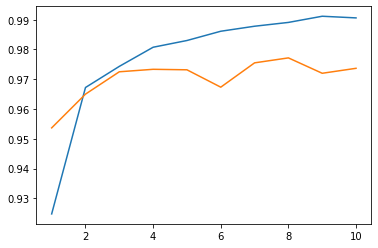

In [47]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])